In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

The command below is called a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) which is built-in for the ipython/jupyter notebook environments. This particular command makes the `matplotlib` plots non-interactive within the notebook. You can use `%matplotlib notebook` to turn them interactive (**Warning**: If you are running your notebook in the Jupyter lab or other environments (like VS Code), the interactive mode command might fail, but alternatives do exist).

In [2]:
%matplotlib inline

Let's generate some data

In [3]:
N = 100 # Number of data points
data_X = np.random.normal(size=N)
data_Y = np.random.normal(loc=2*data_X,size=N)
data_Yerr = np.random.uniform(0.1,0.5,size=N)
model_X = np.linspace(-4,4,100)
model_Y = 2*model_X

We want to have a consistent way to create and manipulate matplotlib "plots". There are many matplotlib shortcuts and quick tricks to do create plots, but they sometimes cut corners in what is happening to the memory/attributes assigned to an object, and ultimately when the plots grow complicated, they can randomly override plot settings that are hard to pin down, retrieve and tweak explicitly. Thus, here one way to assign things and manipulate things clearly. By no means this is the only way or the best way. This is simply an example to give you a feeling of how the matplotlib eco-system operates.

## Figure
The encompassing object holding all the elements in what we casually call a "*plot*" is a matplotlib `figure` object:

In [4]:
fig = plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

As you can see this `figure` is currently empty. We can populate this empty figure with `axes` (i.e., sort of like a "*panel*"). 

## Axes

**Note**: The two terms (`subplot` and `axes`) are typically used interchangably in matplotlib and the commands in matplotlib that have the term `subplot` in their name (like the one used below) which actually create `axes` do not help with this confusion much either. My understanding is that there is no such thing as a `subplot` object in matplotlib, and is simply a term used in some commands which in fact create axes.

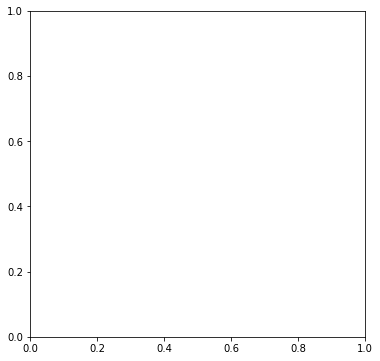

In [5]:
ax1 = fig.add_subplot(1,1,1)
fig

Now the figure has a "panel" (`axes`), and we can add plotting elements to it:

## Plotting

There are plenty of plotting methods available in matplotlib. Have a look [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html) for some examples.

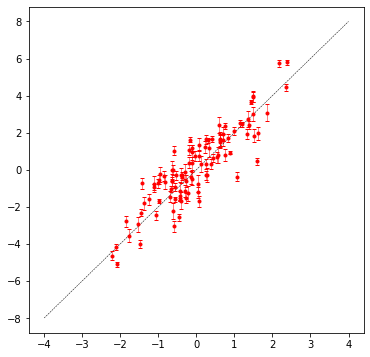

In [6]:
p1 = ax1.plot(model_X,model_Y, color='black', linestyle='--', linewidth=0.5, label='Model')
p2 = ax1.errorbar(data_X,data_Y, data_Yerr, fmt='.', color='red', elinewidth=0.5, capsize=2.0, label='Data')
fig

`p1` and `p2` are plotting elements - collections of different geometrical shapes/classes defined by matplotlib (e.g., `Line2D`)

## Plot cosmetics

Now we can make things look nicer. I have combined a bunch of different tricks on this in the example snippet below to demonstrate that. You don't need all of them all the time, but these are some examples of what is available.

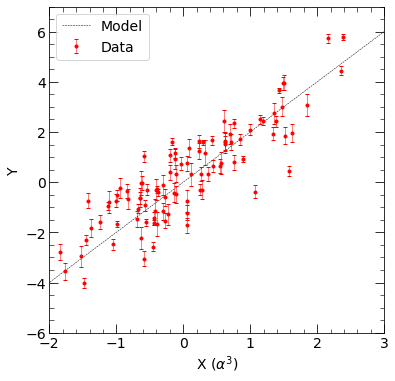

In [7]:
ax1.set_xlim(-2,3)
ax1.set_ylim(-6,7)
ax1.set_xlabel(r'X ($\alpha^{3}$)', fontsize=14)  # You can put "r" before your string and $$ for latex-like math mode
ax1.set_ylabel('Y', fontsize=14)
ax1.legend(loc=2, fontsize=14)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig

## Latex rendering and setting fonts
You can tweak a lot of matplotlib properties and styles using config files (e.g., see [here](https://www.hfstevance.com/blog/2019/7/22/matplotlib-style)), but for now I'll just tweak things manually.

In [8]:
mpl.rc('text', usetex=True)    # You don't need Latex all the time, you can set it to False
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
mpl.rc('font', **font)

You can update the same plot if you put these parameters after you make a plot/figure, but it's typically easier to introduce these configurations prior to initiating a figure. So, I simply put all the things above into a single cell and redo the plot below (now with new font properties defined above).

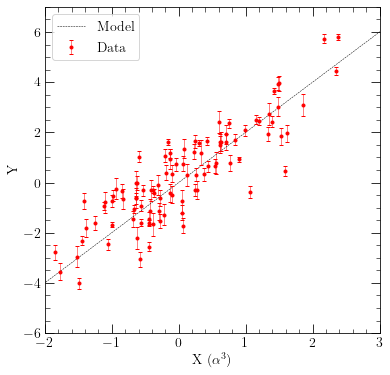

In [9]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
p1 = ax1.plot(model_X,model_Y, color='black', linestyle='--', linewidth=0.5, label='Model')
p2 = ax1.errorbar(data_X,data_Y, data_Yerr, fmt='.', color='red', elinewidth=0.5, capsize=2.0, label='Data')
ax1.set_xlim(-2,3)
ax1.set_ylim(-6,7)
ax1.set_xlabel(r'X ($\alpha^{3}$)', fontsize=14)  # You can put "r" before your string and $$ for latex-like math mode
ax1.set_ylabel('Y', fontsize=14)
ax1.legend(loc=2, fontsize=14)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both', direction='in', right=True, top=True)

## Saving

You can save the plot in many available formats, including vector graphics (pdf, svg) or pixel (jpg, png).

In [10]:
fig.savefig('example.jpg',dpi=300,bbox_inches='tight')
fig.savefig('example.pdf',bbox_inches='tight')   # Vector graphics don't need DPI value

The `bbox_inches='tight'` argument reduces the amount of white space around a figure and is very useful when dealing with putting a plot in a paper.


## Bonus: manipulating an already existing figure

Sometimes, you use other packages, etc that just simply return a matplotlib `figure` object and you want to tweak that without creating a new object from scratch. You can do that simply by recognizing that the object is likely (not all the time though, if the function/package you use does really complex things to figures) to have similar layers and components as we built above. 

So, as an example, let's grab the figure we made above (directly, assuming it's a blackbox output of a package we used, thus we don't have `ax1` defined like we defined above) and do two things:
- Set Y axis limit to -5:5
- Add a new plotting element: a straight line $Y=1$

We do this in two steps: first we extract the `axes` object from the `figure` and then manipulate the properties and attributes of that.

First, let's examine what are the axes in this figure:

In [11]:
fig.axes

[<AxesSubplot:xlabel='X ($\\alpha^{3}$)', ylabel='Y'>]

It returns an array with a single element (which is the `axes` we made). So we can tweak that directly:

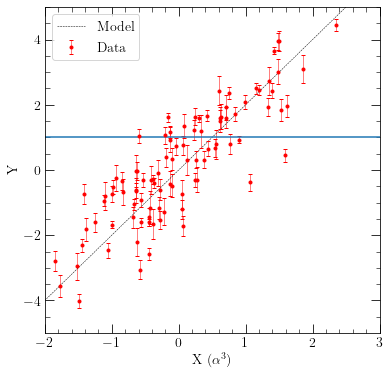

In [12]:
fig.axes[0].set_ylim(-5,5)
fig.axes[0].axhline(1)
fig

There are more complex manipulations you can attempt, like `get_children()` which provide all the elements in the `axes` and you can tweak those, but I'm avoiding those for this simple example.